In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [2]:
# Load the datasets from the assignment_1_data folder
path = "assignment_1_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
graphs = [nx.read_gml(path + f) for f in files]

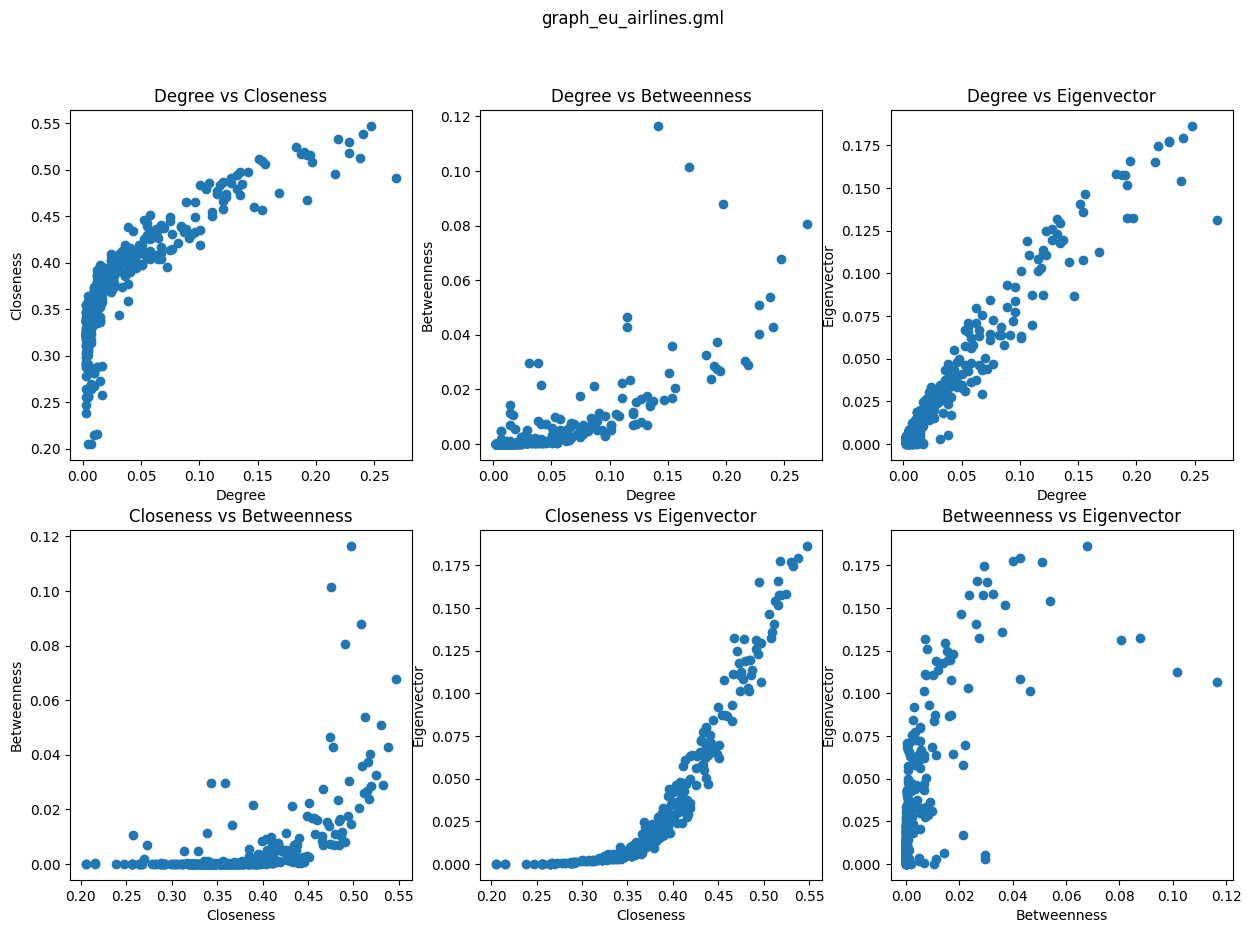

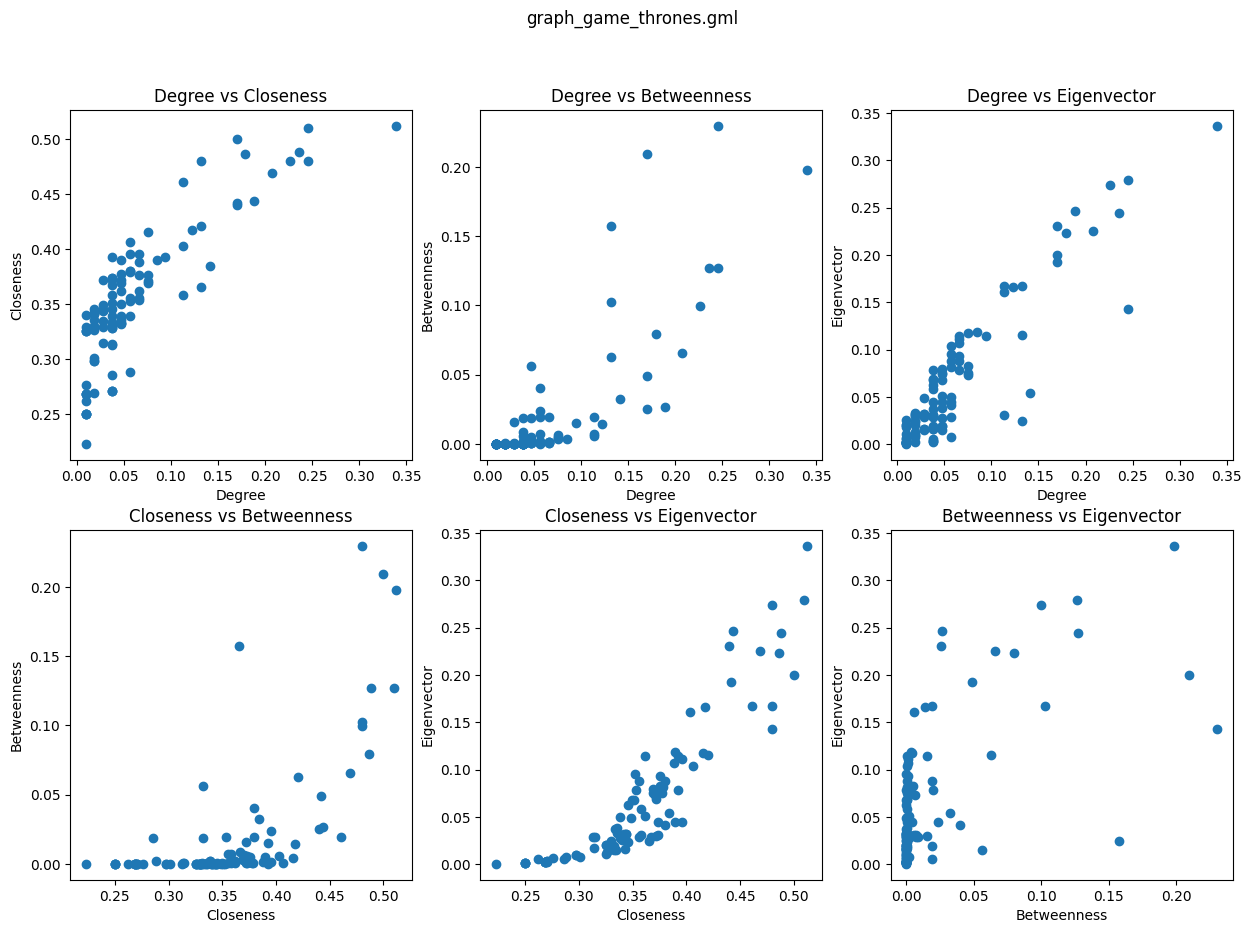

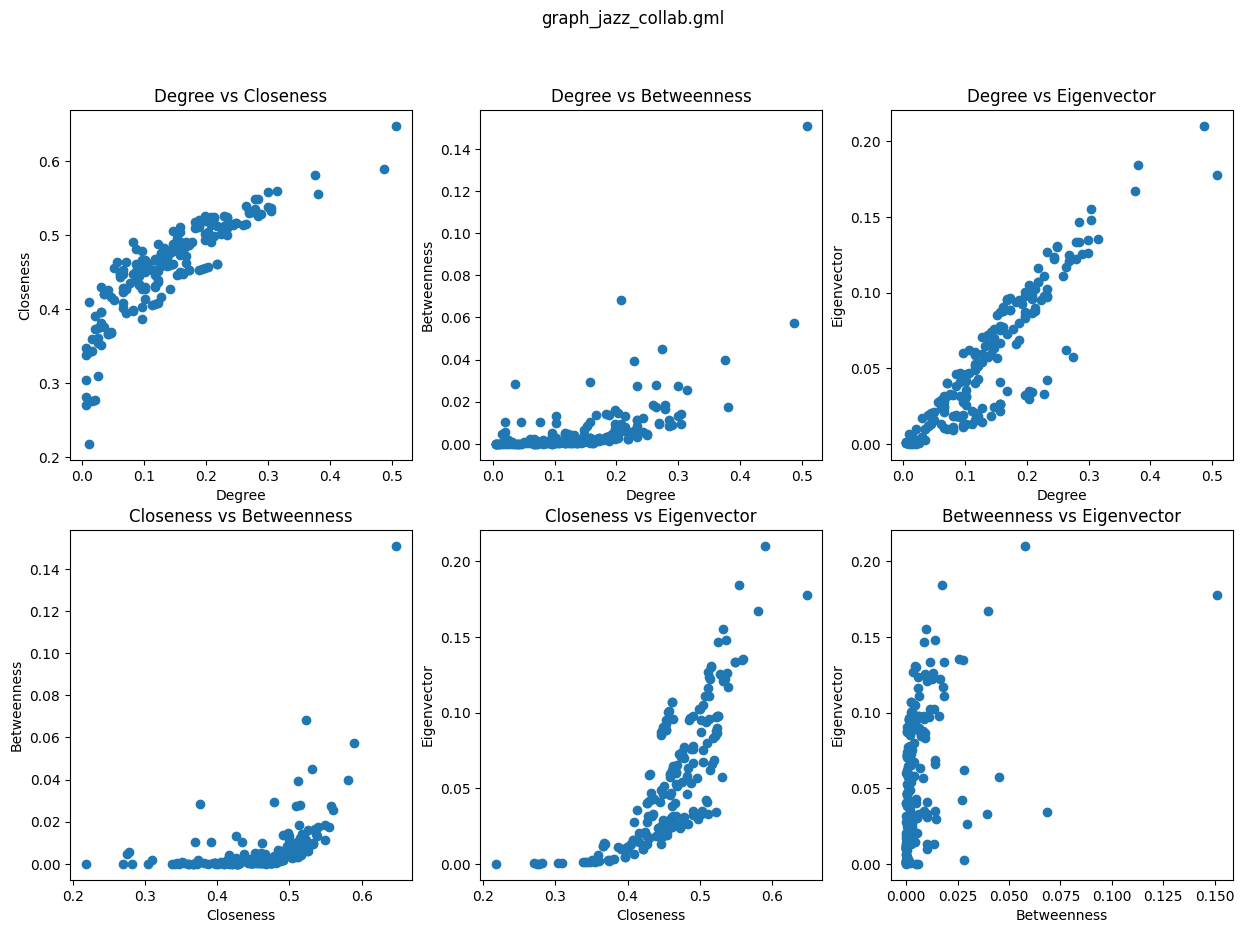

In [8]:
# Compute degree, closeness, betweenness and eigenvector centrality for each node.
# Store the results in a list of dictionaries, one for each graph.
centrality = []
for graph in graphs:
    centrality.append({
        "degree": nx.degree_centrality(graph),
        "closeness": nx.closeness_centrality(graph),
        "betweenness": nx.betweenness_centrality(graph),
        "eigenvector": nx.eigenvector_centrality(graph)
    })

# Do a scatter plot of each pair of centrality measures for each graph.
for i, graph in enumerate(graphs):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(files[i])
    axs[0, 0].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["closeness"].values()))
    axs[0, 0].set_title("Degree vs Closeness")
    axs[0, 0].set(xlabel="Degree", ylabel="Closeness")
    axs[0, 1].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["betweenness"].values()))
    axs[0, 1].set_title("Degree vs Betweenness")
    axs[0, 1].set(xlabel="Degree", ylabel="Betweenness")  
    axs[0, 2].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["eigenvector"].values()))
    axs[0, 2].set_title("Degree vs Eigenvector")
    axs[0, 2].set(xlabel="Degree", ylabel="Eigenvector")
    axs[1, 0].scatter(list(centrality[i]["closeness"].values()), list(centrality[i]["betweenness"].values()))
    axs[1, 0].set_title("Closeness vs Betweenness")
    axs[1, 0].set(xlabel="Closeness", ylabel="Betweenness")
    axs[1, 1].scatter(list(centrality[i]["closeness"].values()), list(centrality[i]["eigenvector"].values()))
    axs[1, 1].set_title("Closeness vs Eigenvector")
    axs[1, 1].set(xlabel="Closeness", ylabel="Eigenvector")
    axs[1, 2].scatter(list(centrality[i]["betweenness"].values()), list(centrality[i]["eigenvector"].values()))
    axs[1, 2].set_title("Betweenness vs Eigenvector")
    axs[1, 2].set(xlabel="Betweenness", ylabel="Eigenvector")
    plt.show()


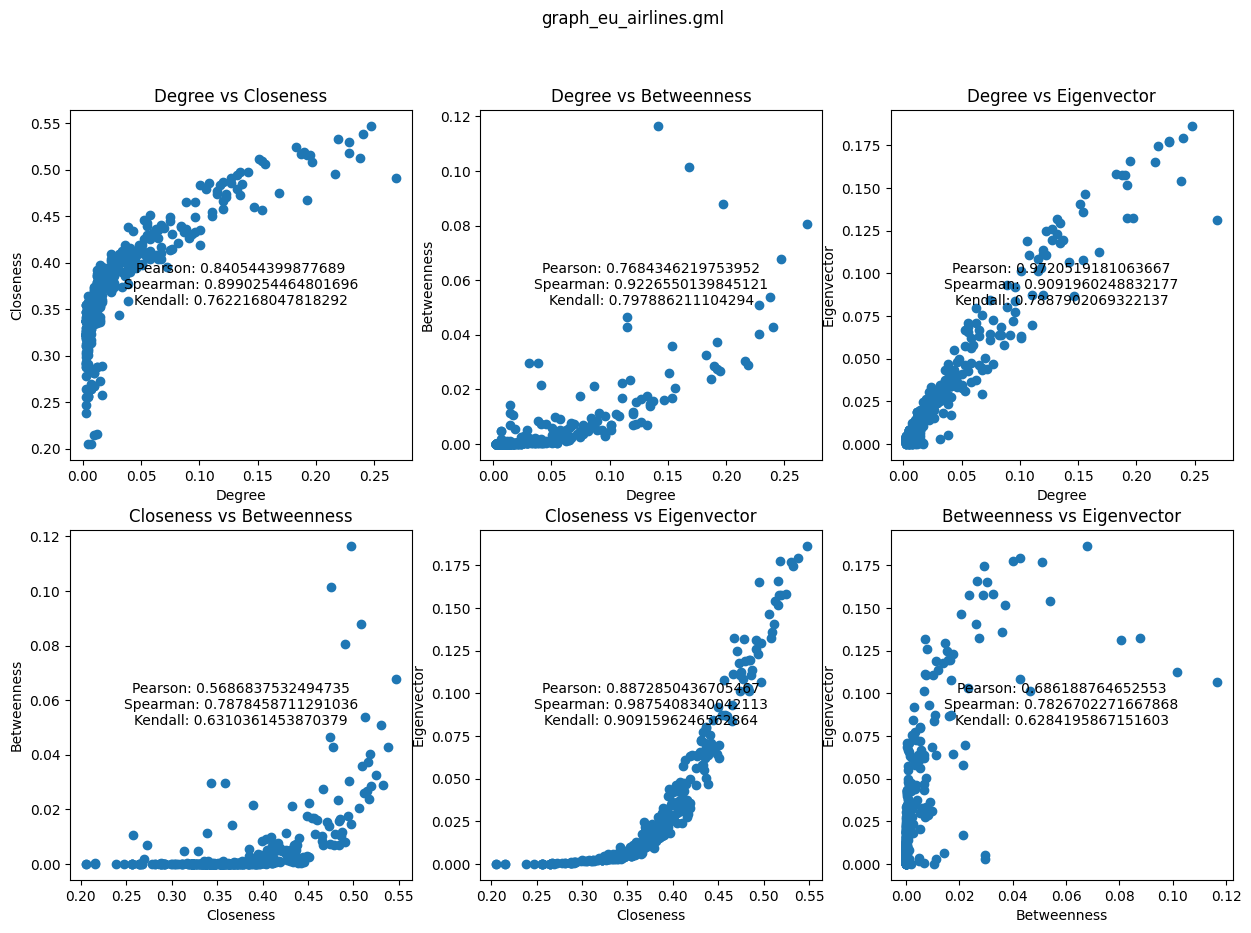

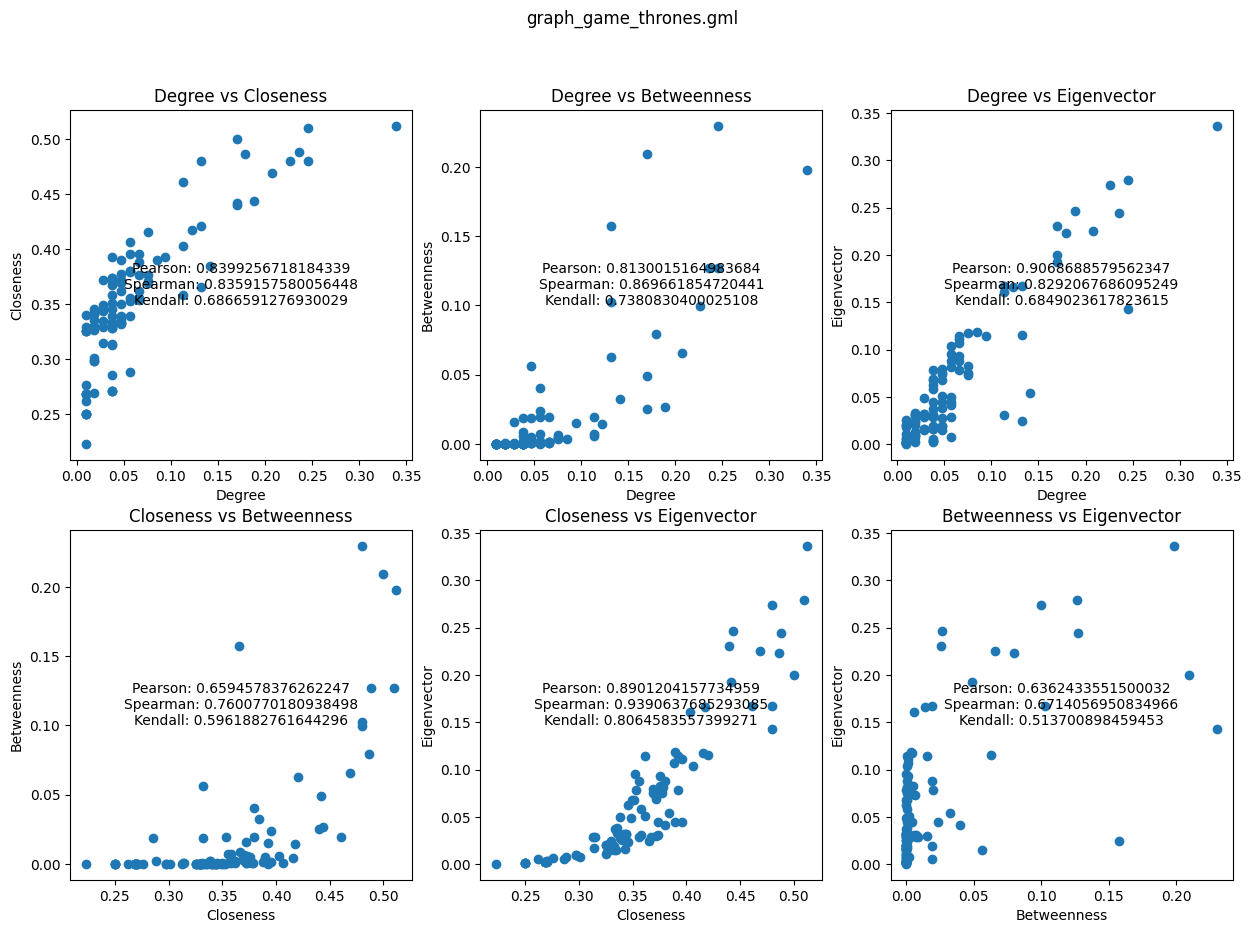

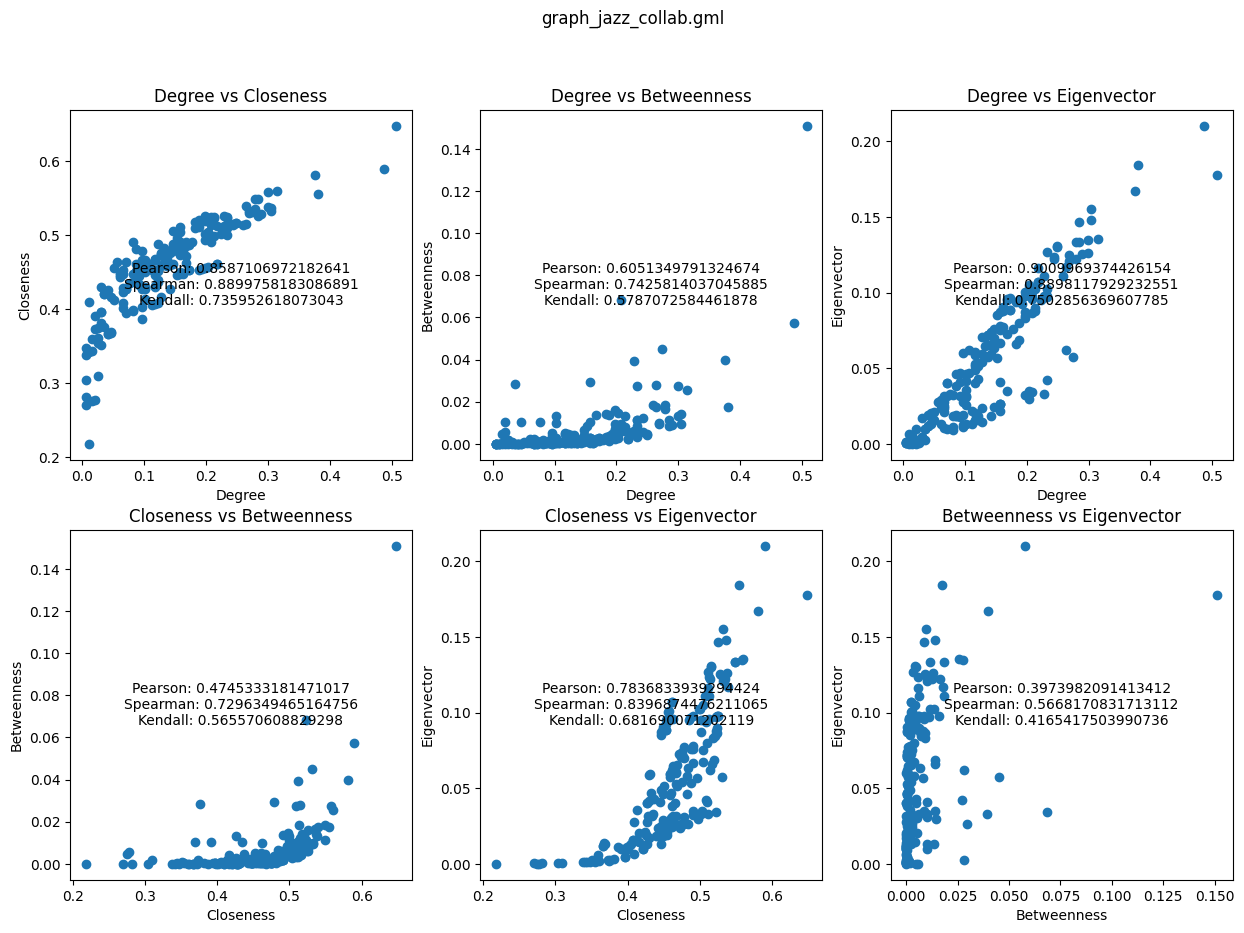

In [15]:
# Compute Pearson, Spearman and Kendall correlation coefficient for each pair and note them on the scatter plots.

# Pearson
pearson = []
for graph in centrality:
    pearson.append({
        "degree_closeness": stats.pearsonr(list(graph["degree"].values()), list(graph["closeness"].values())),
        "degree_betweenness": stats.pearsonr(list(graph["degree"].values()), list(graph["betweenness"].values())),
        "degree_eigenvector": stats.pearsonr(list(graph["degree"].values()), list(graph["eigenvector"].values())),
        "closeness_betweenness": stats.pearsonr(list(graph["closeness"].values()), list(graph["betweenness"].values())),
        "closeness_eigenvector": stats.pearsonr(list(graph["closeness"].values()), list(graph["eigenvector"].values())),
        "betweenness_eigenvector": stats.pearsonr(list(graph["betweenness"].values()), list(graph["eigenvector"].values()))
    })

# Spearman
spearman = []
for graph in centrality:
    spearman.append({
        "degree_closeness": stats.spearmanr(list(graph["degree"].values()), list(graph["closeness"].values())),
        "degree_betweenness": stats.spearmanr(list(graph["degree"].values()), list(graph["betweenness"].values())),
        "degree_eigenvector": stats.spearmanr(list(graph["degree"].values()), list(graph["eigenvector"].values())),
        "closeness_betweenness": stats.spearmanr(list(graph["closeness"].values()), list(graph["betweenness"].values())),
        "closeness_eigenvector": stats.spearmanr(list(graph["closeness"].values()), list(graph["eigenvector"].values())),
        "betweenness_eigenvector": stats.spearmanr(list(graph["betweenness"].values()), list(graph["eigenvector"].values()))
    })

# Kendall
kendall = []
for graph in centrality:
    kendall.append({
        "degree_closeness": stats.kendalltau(list(graph["degree"].values()), list(graph["closeness"].values())),
        "degree_betweenness": stats.kendalltau(list(graph["degree"].values()), list(graph["betweenness"].values())),
        "degree_eigenvector": stats.kendalltau(list(graph["degree"].values()), list(graph["eigenvector"].values())),
        "closeness_betweenness": stats.kendalltau(list(graph["closeness"].values()), list(graph["betweenness"].values())),
        "closeness_eigenvector": stats.kendalltau(list(graph["closeness"].values()), list(graph["eigenvector"].values())),
        "betweenness_eigenvector": stats.kendalltau(list(graph["betweenness"].values()), list(graph["eigenvector"].values()))
    })


for i, graph in enumerate(graphs):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(files[i])
    axs[0, 0].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["closeness"].values()))
    axs[0, 0].set_title("Degree vs Closeness")
    axs[0, 0].set(xlabel="Degree", ylabel="Closeness")
    axs[0, 0].text(0.5, 0.5, "Pearson: " + str(pearson[i]["degree_closeness"][0]) + "\nSpearman: " + str(spearman[i]["degree_closeness"][0]) + "\nKendall: " + str(kendall[i]["degree_closeness"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transAxes)
    axs[0, 1].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["betweenness"].values()))
    axs[0, 1].set_title("Degree vs Betweenness")
    axs[0, 1].set(xlabel="Degree", ylabel="Betweenness")
    axs[0, 1].text(0.5, 0.5, "Pearson: " + str(pearson[i]["degree_betweenness"][0]) + "\nSpearman: " + str(spearman[i]["degree_betweenness"][0]) + "\nKendall: " + str(kendall[i]["degree_betweenness"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[0, 1].transAxes)
    axs[0, 2].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["eigenvector"].values()))
    axs[0, 2].set_title("Degree vs Eigenvector")
    axs[0, 2].set(xlabel="Degree", ylabel="Eigenvector")
    axs[0, 2].text(0.5, 0.5, "Pearson: " + str(pearson[i]["degree_eigenvector"][0]) + "\nSpearman: " + str(spearman[i]["degree_eigenvector"][0]) + "\nKendall: " + str(kendall[i]["degree_eigenvector"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[0, 2].transAxes)
    axs[1, 0].scatter(list(centrality[i]["closeness"].values()), list(centrality[i]["betweenness"].values()))
    axs[1, 0].set_title("Closeness vs Betweenness")
    axs[1, 0].set(xlabel="Closeness", ylabel="Betweenness")
    axs[1, 0].text(0.5, 0.5, "Pearson: " + str(pearson[i]["closeness_betweenness"][0]) + "\nSpearman: " + str(spearman[i]["closeness_betweenness"][0]) + "\nKendall: " + str(kendall[i]["closeness_betweenness"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[1, 0].transAxes)
    axs[1, 1].scatter(list(centrality[i]["closeness"].values()), list(centrality[i]["eigenvector"].values()))
    axs[1, 1].set_title("Closeness vs Eigenvector")
    axs[1, 1].set(xlabel="Closeness", ylabel="Eigenvector")
    axs[1, 1].text(0.5, 0.5, "Pearson: " + str(pearson[i]["closeness_eigenvector"][0]) + "\nSpearman: " + str(spearman[i]["closeness_eigenvector"][0]) + "\nKendall: " + str(kendall[i]["closeness_eigenvector"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes)
    axs[1, 2].scatter(list(centrality[i]["betweenness"].values()), list(centrality[i]["eigenvector"].values()))
    axs[1, 2].set_title("Betweenness vs Eigenvector")
    axs[1, 2].set(xlabel="Betweenness", ylabel="Eigenvector")
    axs[1, 2].text(0.5, 0.5, "Pearson: " + str(pearson[i]["betweenness_eigenvector"][0]) + "\nSpearman: " + str(spearman[i]["betweenness_eigenvector"][0]) + "\nKendall: " + str(kendall[i]["betweenness_eigenvector"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[1, 2].transAxes)
    plt.show()


In [16]:
randomised_graphs = [nx.algorithms.smallworld.random_reference(G=G, niter=1, connectivity=False, seed=1337) for G in graphs]

In [18]:
# Compute Pearson, Spearman and Kendall correlation coefficient for each pair and note them on the scatter plots.

# Pearson
pearson = []
for graph in randomised_graphs:
    pearson.append({
        "degree_closeness": stats.pearsonr(list(nx.degree_centrality(graph).values()), list(nx.closeness_centrality(graph).values())),
        "degree_betweenness": stats.pearsonr(list(nx.degree_centrality(graph).values()), list(nx.betweenness_centrality(graph).values())),
        "degree_eigenvector": stats.pearsonr(list(nx.degree_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values())),
        "closeness_betweenness": stats.pearsonr(list(nx.closeness_centrality(graph).values()), list(nx.betweenness_centrality(graph).values())),
        "closeness_eigenvector": stats.pearsonr(list(nx.closeness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values())),
        "betweenness_eigenvector": stats.pearsonr(list(nx.betweenness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values()))
    })

# Spearman
spearman = []
for graph in randomised_graphs:
    spearman.append({
        "degree_closeness": stats.spearmanr(list(nx.degree_centrality(graph).values()), list(nx.closeness_centrality(graph).values())),
        "degree_betweenness": stats.spearmanr(list(nx.degree_centrality(graph).values()), list(nx.betweenness_centrality(graph).values())),
        "degree_eigenvector": stats.spearmanr(list(nx.degree_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values())),
        "closeness_betweenness": stats.spearmanr(list(nx.closeness_centrality(graph).values()), list(nx.betweenness_centrality(graph).values())),
        "closeness_eigenvector": stats.spearmanr(list(nx.closeness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values())),
        "betweenness_eigenvector": stats.spearmanr(list(nx.betweenness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values()))
    })

# Kendall
kendall = []
for graph in randomised_graphs:
    kendall.append({
        "degree_closeness": stats.kendalltau(list(nx.degree_centrality(graph).values()), list(nx.closeness_centrality(graph).values())),
        "degree_betweenness": stats.kendalltau(list(nx.degree_centrality(graph).values()), list(nx.betweenness_centrality(graph).values())),
        "degree_eigenvector": stats.kendalltau(list(nx.degree_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values())),
        "closeness_betweenness": stats.kendalltau(list(nx.closeness_centrality(graph).values()), list(nx.betweenness_centrality(graph).values())),
        "closeness_eigenvector": stats.kendalltau(list(nx.closeness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values())),
        "betweenness_eigenvector": stats.kendalltau(list(nx.betweenness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values()))
    })

for i, graph in randomised_graphs:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(files[i])
    axs[0, 0].scatter(list(nx.degree_centrality(graph).values()), list(nx.closeness_centrality(graph).values()), color="red")
    axs[0, 0].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["closeness"].values()), color="blue")
    axs[0, 0].set_title("Degree vs Closeness")
    axs[0, 0].set(xlabel="Degree", ylabel="Closeness")
    axs[0, 0].text(0.5, 0.5, "Pearson: " + str(pearson[i]["degree_closeness"][0]) + "\nSpearman: " + str(spearman[i]["degree_closeness"][0]) + "\nKendall: " + str(kendall[i]["degree_closeness"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transAxes)
    axs[0, 1].scatter(list(nx.degree_centrality(graph).values()), list(nx.betweenness_centrality(graph).values()), color="red")
    axs[0, 1].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["betweenness"].values()), color="blue")
    axs[0, 1].set_title("Degree vs Betweenness")
    axs[0, 1].set(xlabel="Degree", ylabel="Betweenness")
    axs[0, 1].text(0.5, 0.5, "Pearson: " + str(pearson[i]["degree_betweenness"][0]) + "\nSpearman: " + str(spearman[i]["degree_betweenness"][0]) + "\nKendall: " + str(kendall[i]["degree_betweenness"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[0, 1].transAxes)
    axs[0, 2].scatter(list(nx.degree_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values()), color="red")
    axs[0, 2].scatter(list(centrality[i]["degree"].values()), list(centrality[i]["eigenvector"].values()), color="blue")
    axs[0, 2].set_title("Degree vs Eigenvector")
    axs[0, 2].set(xlabel="Degree", ylabel="Eigenvector")
    axs[0, 2].text(0.5, 0.5, "Pearson: " + str(pearson[i]["degree_eigenvector"][0]) + "\nSpearman: " + str(spearman[i]["degree_eigenvector"][0]) + "\nKendall: " + str(kendall[i]["degree_eigenvector"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[0, 2].transAxes)
    axs[1, 0].scatter(list(nx.closeness_centrality(graph).values()), list(nx.betweenness_centrality(graph).values()), color="red")
    axs[1, 0].scatter(list(centrality[i]["closeness"].values()), list(centrality[i]["betweenness"].values()), color="blue")
    axs[1, 0].set_title("Closeness vs Betweenness")
    axs[1, 0].set(xlabel="Closeness", ylabel="Betweenness")
    axs[1, 0].text(0.5, 0.5, "Pearson: " + str(pearson[i]["closeness_betweenness"][0]) + "\nSpearman: " + str(spearman[i]["closeness_betweenness"][0]) + "\nKendall: " + str(kendall[i]["closeness_betweenness"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[1, 0].transAxes)
    axs[1, 1].scatter(list(nx.closeness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values()), color="red")
    axs[1, 1].scatter(list(centrality[i]["closeness"].values()), list(centrality[i]["eigenvector"].values()), color="blue")
    axs[1, 1].set_title("Closeness vs Eigenvector")
    axs[1, 1].set(xlabel="Closeness", ylabel="Eigenvector")
    axs[1, 1].text(0.5, 0.5, "Pearson: " + str(pearson[i]["closeness_eigenvector"][0]) + "\nSpearman: " + str(spearman[i]["closeness_eigenvector"][0]) + "\nKendall: " + str(kendall[i]["closeness_eigenvector"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes)
    axs[1, 2].scatter(list(nx.betweenness_centrality(graph).values()), list(nx.eigenvector_centrality(graph).values()), color="red")
    axs[1, 2].scatter(list(centrality[i]["betweenness"].values()), list(centrality[i]["eigenvector"].values()), color="blue")
    axs[1, 2].set_title("Betweenness vs Eigenvector")
    axs[1, 2].set(xlabel="Betweenness", ylabel="Eigenvector")
    axs[1, 2].text(0.5, 0.5, "Pearson: " + str(pearson[i]["betweenness_eigenvector"][0]) + "\nSpearman: " + str(spearman[i]["betweenness_eigenvector"][0]) + "\nKendall: " + str(kendall[i]["betweenness_eigenvector"][0]), horizontalalignment='center', verticalalignment='center', transform=axs[1, 2].transAxes)
    plt.show()
    


ValueError: too many values to unpack (expected 2)